# Chronic Kidney Disease Prediction With CRISP DM


<img src="kidney-disease.jpg">

<a id = '0'></a>
<p >Table of Contents</strong></p> 

* Importing Libraries
* EDA & Preprocess
* Feature Encoding
* Model Building
    * SVM
    * MLPClassifier
    * Logistic Regression
* Models Comparison
* Model Saving 
* Model Deployment 

# Importing Libraries

In [3]:
#!pip install missingno
#!pip install flask
#!pip install sklearn2pmml
#!pip install joblib

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn2pmml import PMMLPipeline, sklearn2pmml
import joblib
from flask import Flask, request, jsonify


# EDA & Preprocess

##  Desciption of dataset 

The dataset is taken in India. It has 400 rows with 25 features like red blood cells, pedal edema, sugar,etc. The aim is to classify whether a patient has chronic kidney disease or not. <br>
The classification is based on a attribute named 'classification' which is either 'ckd'(chronic kidney disease) or 'notckd. 

Importing the dataset using Pandas

In [5]:
kidney_disease_df = pd.read_csv("kidney_disease.csv")


Number of columns of dataset

In [6]:
kidney_disease_df.columns.shape

(26,)

Columns description

In [7]:
kidney_disease_df.columns.size

26

In [8]:
# bp => blood pressure
# sg => specific gravity 
# al => albumin 
# su => sugar pressure
# rbc => red blood cells
# pc => pus cell 
# pcc => pus cell clumps 
# ba => bacteria 
# bgr => blood glucose random 
# bu => blood urea 
# sc => serum creatinine 
# sod => sodium 
# pot => potassium 
# hemo => hemoglobin 
# pcv => packed cell volume 
# wc => white blood cell count 
# rc => red blood cell count 
# htn => hypertension 
# dm => diabetes mellitus 
# cad => coronary artery disease 
# appet => appetite  :In the context of a dataset on kidney disease, "appetite" likely refers to a patient's level of hunger or desire to eat.
# pe => pedal edema 
# ane => anemia 
# classification => class 


Head of dataset

In [9]:
# Show all columns in the output
pd.set_option('display.max_columns', None)
kidney_disease_df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


Statistic description of dataset

As displayed in the figure below, we have 11 numerical variables

In [10]:
kidney_disease_df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Desciptive statistic 


In [11]:
kidney_disease_df.describe(include="all")

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,NaN,NaN,NaN,NaN,NaN,NaN,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informations about dataset

In [12]:
kidney_disease_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Sum of nulls values in variables

In [13]:
kidney_disease_df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Displaying Frequencies for Categorical Variables


We will treat the variables whose types are not numerical (as seen in the dataset description).<br>
Because wc (white blood cell count), rc (red blood cell count), and pcv (packed cell volume) are currently stored as strings in the dataset, we will convert them to float in the next step in order to perform numerical operations on them.

We notice that we have a fault here So we have to change the ckd\t to ckd 

In [14]:
print(kidney_disease_df['classification'].value_counts())
#PreProc :Replace all instances of 'ckd\t' with 'ckd' in the 'classification' column
kidney_disease_df['classification'].replace('ckd\t', 'ckd',inplace=True)
print(kidney_disease_df['classification'].value_counts())


ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64
ckd       250
notckd    150
Name: classification, dtype: int64


<AxesSubplot:xlabel='classification', ylabel='count'>

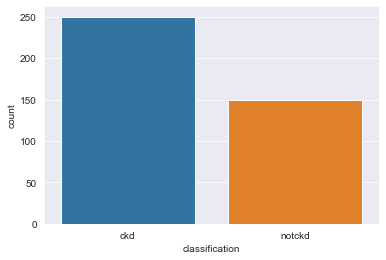

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='classification',data=kidney_disease_df)

In [16]:
print(kidney_disease_df['rbc'].value_counts())


normal      201
abnormal     47
Name: rbc, dtype: int64


In [17]:
print(kidney_disease_df['pc'].value_counts())


normal      259
abnormal     76
Name: pc, dtype: int64


In [18]:
print(kidney_disease_df['pcc'].value_counts())


notpresent    354
present        42
Name: pcc, dtype: int64


In [19]:
print(kidney_disease_df['ba'].value_counts())


notpresent    374
present        22
Name: ba, dtype: int64


In [20]:
print(kidney_disease_df['htn'].value_counts())


no     251
yes    147
Name: htn, dtype: int64


Also here we need to change the \tno to no and \tyes to yes and the space +yes to yes

In [21]:
print(kidney_disease_df['dm'].value_counts())
#(kidney_disease_df['dm']==" yes").value_counts()
#PreProc :Replace all wrong values by correct values
kidney_disease_df['dm'].replace('\tno', 'no',inplace=True)
kidney_disease_df['dm'].replace('\tyes', 'yes',inplace=True)
kidney_disease_df['dm'].replace(' yes', 'yes',inplace=True)
print(kidney_disease_df['dm'].value_counts())


no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
no     261
yes    137
Name: dm, dtype: int64


The same for \tno here

In [22]:
print(kidney_disease_df['cad'].value_counts())
#PreProc :Replace all wrong values by correct values
kidney_disease_df['cad'].replace('\tno', 'no',inplace=True)
print(kidney_disease_df['cad'].value_counts())


no      362
yes      34
\tno      2
Name: cad, dtype: int64
no     364
yes     34
Name: cad, dtype: int64


In [23]:
print(kidney_disease_df['appet'].value_counts())


good    317
poor     82
Name: appet, dtype: int64


In [24]:
print(kidney_disease_df['pe'].value_counts())


no     323
yes     76
Name: pe, dtype: int64


In [25]:
print(kidney_disease_df['ane'].value_counts())

no     339
yes     60
Name: ane, dtype: int64


## Displaying Frequencies for numerical Variables


Preproc : <br>
replacing the wrong values  <br>
pcv,wc,and rc have object type instead of float type we need to convert that 

In [26]:
print(kidney_disease_df['pcv'].value_counts())
#PreProc :Replace all wrong values by correct values
kidney_disease_df['pcv'].replace('\t43', '43',inplace=True)
kidney_disease_df['pcv'].replace('\t?', np.nan,inplace=True)
#change type to float
kidney_disease_df['pcv'] = kidney_disease_df['pcv'].astype(float)
print(kidney_disease_df['pcv'].value_counts())


41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: pcv, dtype: int64
41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
42.0    13
45.0    13
32.0    12
50.0    12
36.0    12
33.0    12
28.0    12
34.0    11
37.0    11
30.0     9
29.0     9
35.0     9
46.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
51.0     4
49.0     4
47.0     4
54.0     4
25.0     3
27.0     3
22.0     3
19.0     2
23.0     2
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
16.0     1
Name: pcv, dtype: int64


In [27]:
print(kidney_disease_df['wc'].value_counts())
#PreProc :Replace all wrong values by correct values
kidney_disease_df['wc'].replace('\t?', np.nan,inplace=True)
#change type to float
kidney_disease_df['wc'] = kidney_disease_df['wc'].astype(float)


9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: wc, Length: 92, dtype: int64


In [28]:
print(kidney_disease_df['rc'].value_counts())
#PreProc :Replace all wrong values by correct values
kidney_disease_df['rc'].replace('\t?', np.nan,inplace=True)
#change type to float
kidney_disease_df['rc'] = kidney_disease_df['rc'].astype(float)

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
5.5     8
6.1     8
5.0     8
3.7     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
4.4     5
5.7     5
6.4     5
5.1     5
6.2     5
6.5     5
4.1     5
3.6     4
6.3     4
6.0     4
4.0     3
3.3     3
4       3
3.5     3
2.9     2
3.1     2
2.6     2
2.1     2
2.5     2
2.8     2
3.0     2
2.7     2
5       2
2.3     1
\t?     1
2.4     1
3       1
8.0     1
Name: rc, dtype: int64


Now we notice that we have exactly 11 feautures with object type (Categorical)

In [29]:

kidney_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

### Deleting the id column

In [30]:
kidney_disease_df.drop('id', axis=1, inplace=True)


In [31]:
kidney_disease_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### Let's see the correlation between numericals values

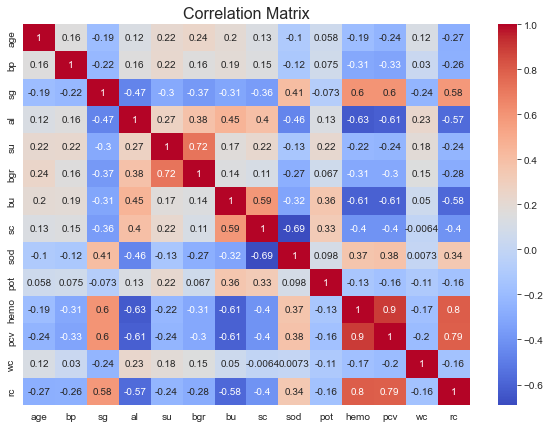

In [32]:

# create a correlation matrix between numerical values
corr_matrix = kidney_disease_df.corr(method='pearson')


# create the heatmap
fig, ax = plt.subplots(figsize=(10, 7)) # adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
ax.set_title('Correlation Matrix', fontsize=16) # add a title and adjust font size
plt.show() # display the figuretrix, annot=True, cmap='coolwarm')


We notice that correlation is  between: <br>
pcv and hemo positvely high 0.9 <br>
rc and hemo postively high 0.8 <br>
rc and pcv postively high 0.79  <br>
bgr and su is positively high 0.72<br>


As can be seen, the percentage of null values does not exceed 70%, indicating a relatively low amount of missing data.

In [33]:
print(kidney_disease_df.count().max()*0.7)
kidney_disease_df.isnull().sum()

280.0


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Histograms for numericals features

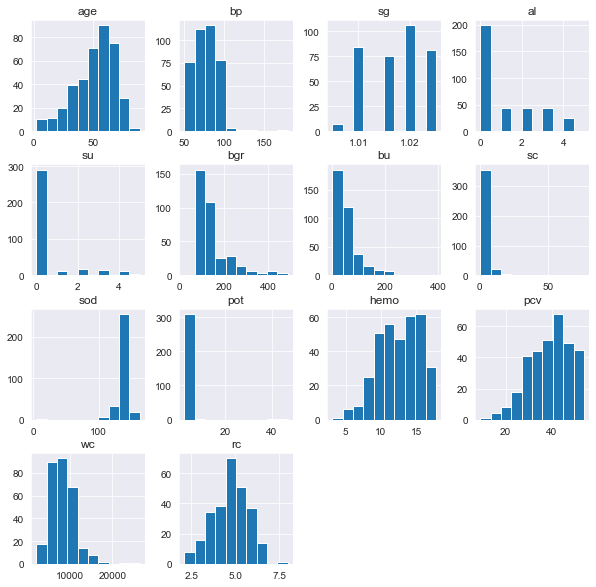

In [34]:
# Displaying histograms for numerical variables.
kidney_disease_df.hist(figsize=(10,10)).shape
plt.show()

In [35]:
# Visualiser la distribution de l'âge
#plt.hist(kidney_disease_df['age'], bins=20)
#plt.title("Distribution de l'âge")
#plt.xlabel("Âge")
#plt.ylabel("Fréquence")
#plt.show()

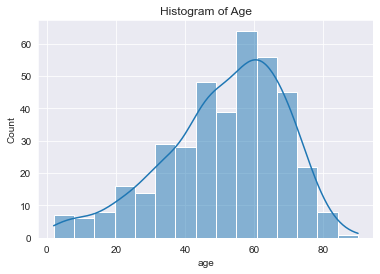

In [36]:
sns.histplot(data=kidney_disease_df, x="age", kde=True)
# add a title to the plot
plt.title('Histogram of Age')
# display the plot
plt.show()

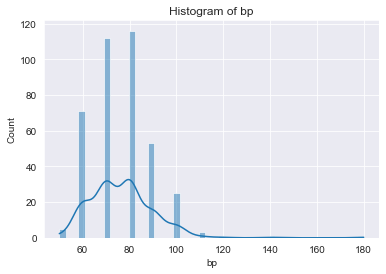

In [37]:
sns.histplot(data=kidney_disease_df, x="bp", kde=True)
# add a title to the plot
plt.title('Histogram of bp')

# display the plot
plt.show()

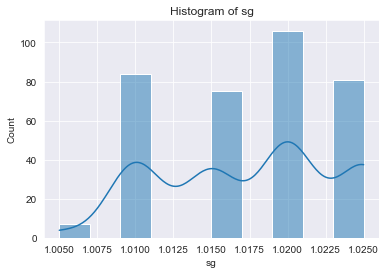

In [38]:
sns.histplot(data=kidney_disease_df, x="sg", kde=True)
# add a title to the plot
plt.title('Histogram of sg')

# display the plot
plt.show()

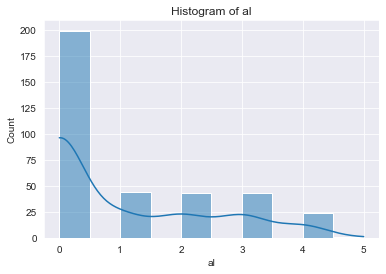

In [39]:
sns.histplot(data=kidney_disease_df, x="al", kde=True)
# add a title to the plot
plt.title('Histogram of al')

# display the plot
plt.show()

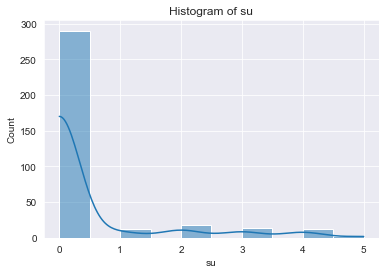

In [40]:
sns.histplot(data=kidney_disease_df, x="su", kde=True)
# add a title to the plot
plt.title('Histogram of su')

# display the plot
plt.show()

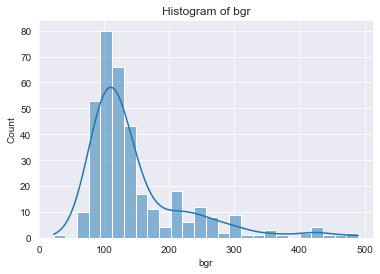

In [41]:
sns.histplot(data=kidney_disease_df, x="bgr", kde=True)
# add a title to the plot
plt.title('Histogram of bgr')

# display the plot
plt.show()

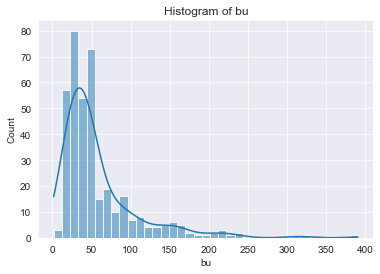

In [42]:
sns.histplot(data=kidney_disease_df, x="bu", kde=True)
# add a title to the plot
plt.title('Histogram of bu')

# display the plot
plt.show()

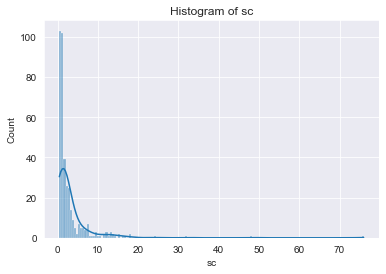

In [43]:
sns.histplot(data=kidney_disease_df, x="sc", kde=True)
# add a title to the plot
plt.title('Histogram of sc')

# display the plot
plt.show()

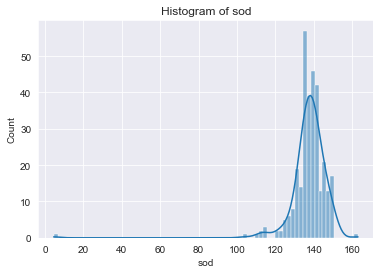

In [44]:
sns.histplot(data=kidney_disease_df, x="sod", kde=True)
# add a title to the plot
plt.title('Histogram of sod')

# display the plot
plt.show()

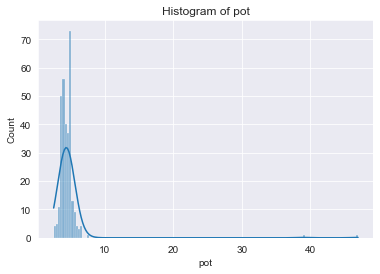

In [45]:
sns.histplot(data=kidney_disease_df, x="pot", kde=True)
# add a title to the plot
plt.title('Histogram of pot')

# display the plot
plt.show()

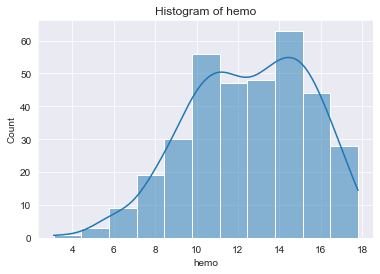

In [46]:
sns.histplot(data=kidney_disease_df, x="hemo", kde=True)
# add a title to the plot
plt.title('Histogram of hemo')

# display the plot
plt.show()

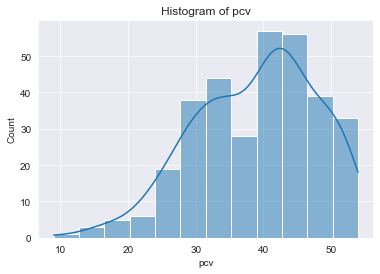

In [47]:
sns.histplot(data=kidney_disease_df, x="pcv", kde=True)
# add a title to the plot
plt.title('Histogram of pcv')

# display the plot
plt.show()

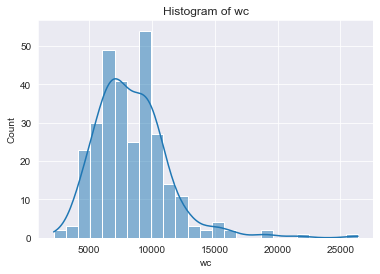

In [48]:
sns.histplot(data=kidney_disease_df, x="wc", kde=True)
# add a title to the plot
plt.title('Histogram of wc')

# display the plot
plt.show()

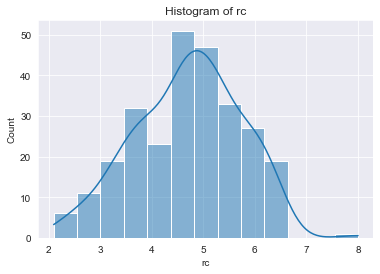

In [49]:
sns.histplot(data=kidney_disease_df, x="rc", kde=True)
# add a title to the plot
plt.title('Histogram of rc')

# display the plot
plt.show()

## Boxplots

 Age

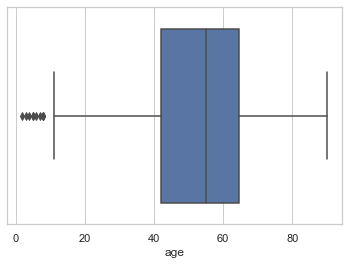

In [50]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["age"])

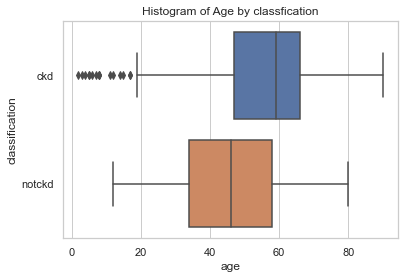

In [51]:
sns.boxplot(data=kidney_disease_df, x="age",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Bp

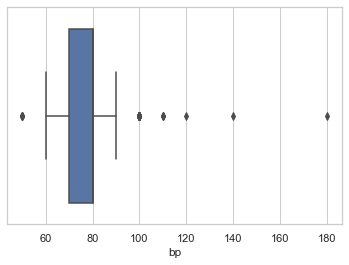

In [52]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["bp"])

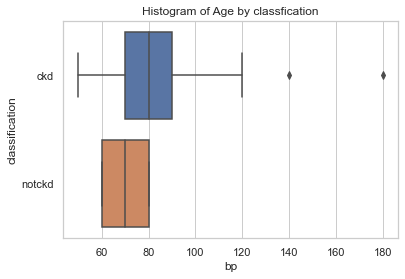

In [53]:
sns.boxplot(data=kidney_disease_df, x="bp",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Sg

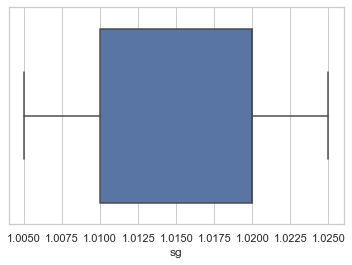

In [54]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["sg"])

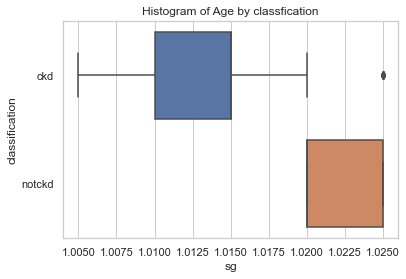

In [55]:
sns.boxplot(data=kidney_disease_df, x="sg",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Al

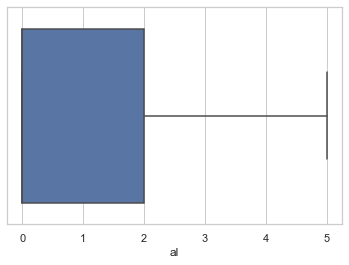

In [56]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["al"])

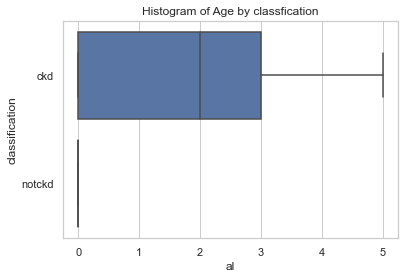

In [57]:
sns.boxplot(data=kidney_disease_df, x="al",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Su

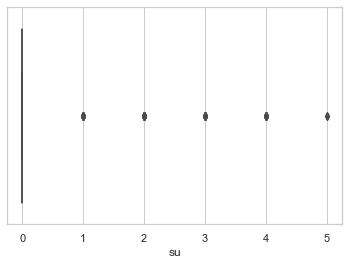

In [58]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["su"])

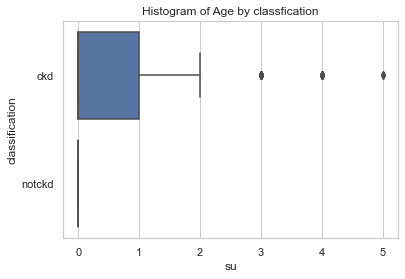

In [59]:
sns.boxplot(data=kidney_disease_df, x="su",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Bgr

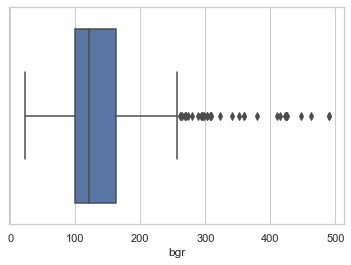

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["bgr"])

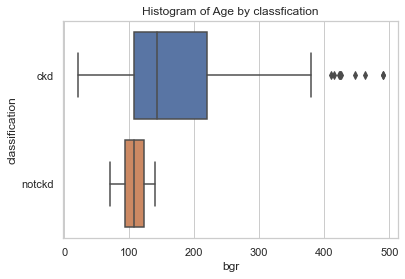

In [61]:
sns.boxplot(data=kidney_disease_df, x="bgr",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Bu

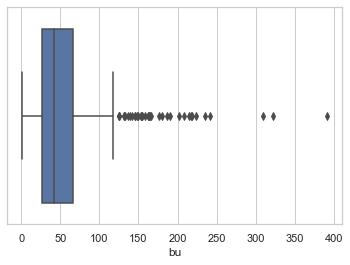

In [62]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["bu"])

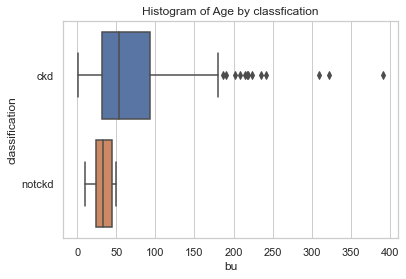

In [63]:
sns.boxplot(data=kidney_disease_df, x="bu",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Sc

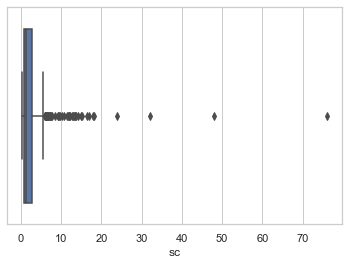

In [64]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["sc"])

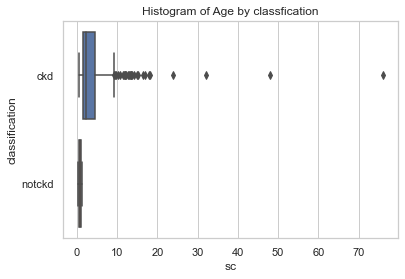

In [65]:
sns.boxplot(data=kidney_disease_df, x="sc",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Sod

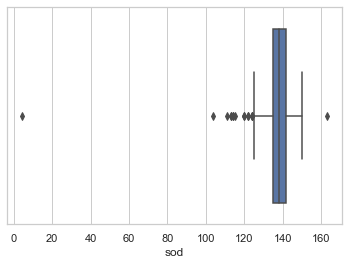

In [66]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["sod"])

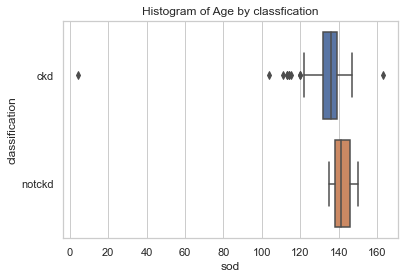

In [67]:
sns.boxplot(data=kidney_disease_df, x="sod",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Pot

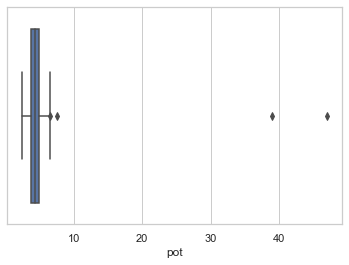

In [68]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["pot"])

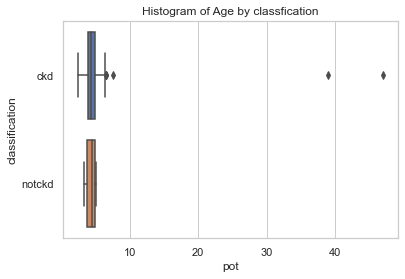

In [69]:
sns.boxplot(data=kidney_disease_df, x="pot",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Hemo

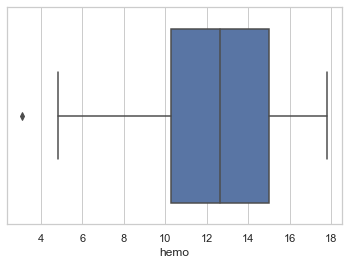

In [70]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["hemo"])

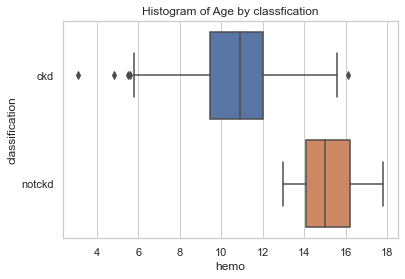

In [71]:
sns.boxplot(data=kidney_disease_df, x="hemo",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Pcv

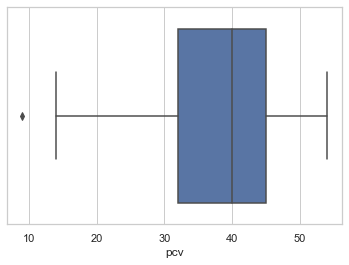

In [72]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["pcv"])

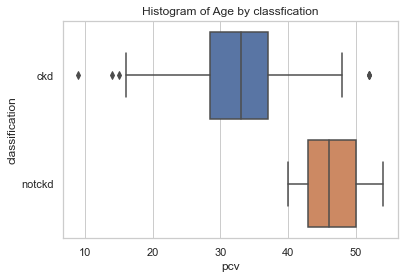

In [73]:
sns.boxplot(data=kidney_disease_df, x="pcv",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Wc

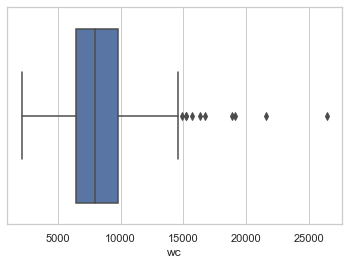

In [74]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["wc"])

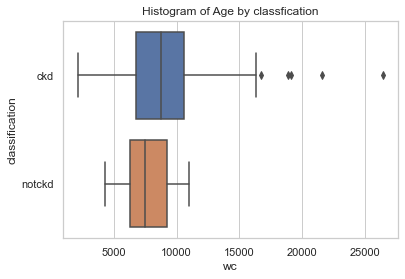

In [75]:
sns.boxplot(data=kidney_disease_df, x="wc",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

Rc

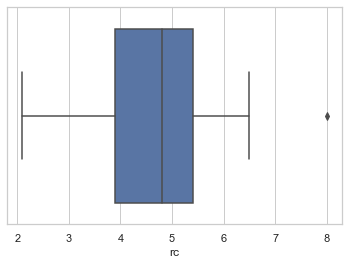

In [76]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=kidney_disease_df["rc"])

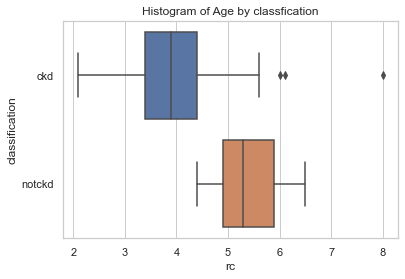

In [77]:
sns.boxplot(data=kidney_disease_df, x="rc",y="classification")
# add a title to the plot
plt.title('Histogram of Age by classfication')
# display the plot
plt.show()

#### Bar charts for categorical variables based on the classification variable

<AxesSubplot:xlabel='classification', ylabel='count'>

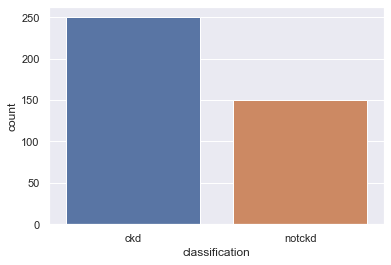

In [78]:
sns.set_style('darkgrid')
sns.countplot(x='classification',data=kidney_disease_df)

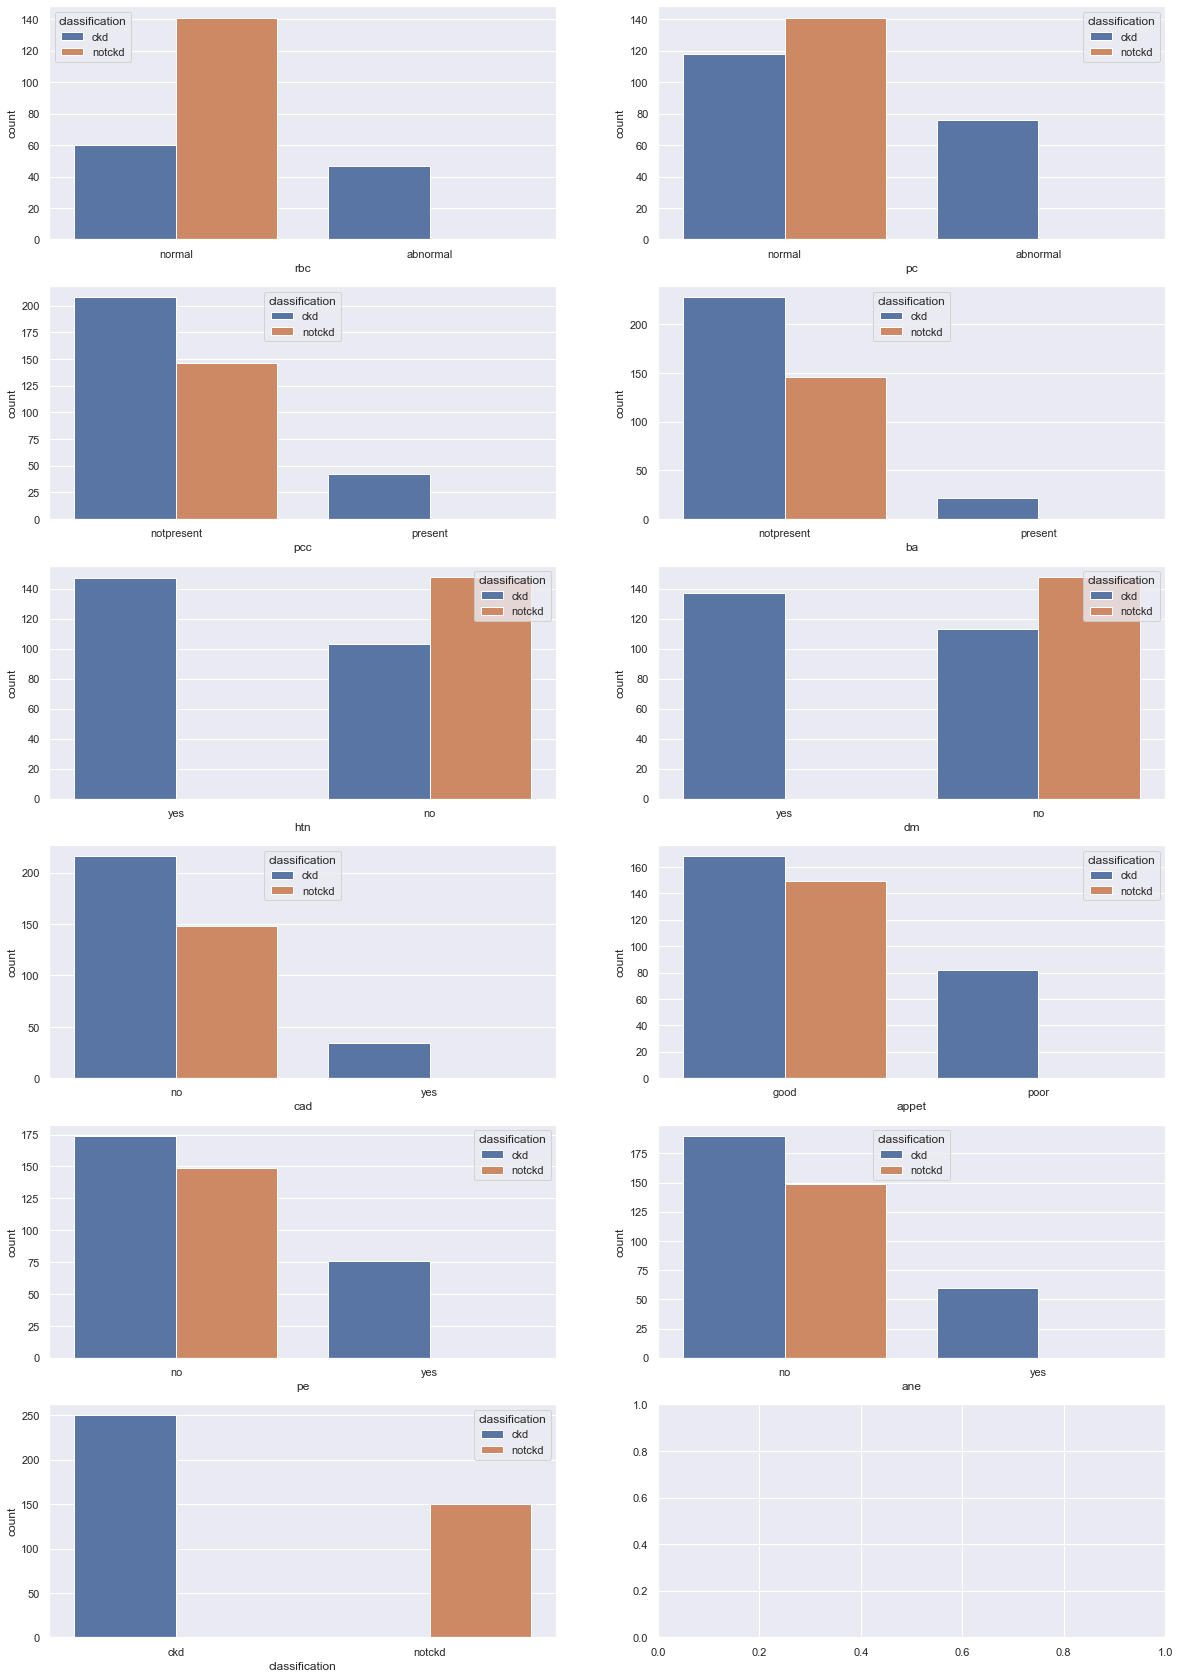

In [79]:
# Affichage des diagrammes en barres pour les variables catégorielles en fonction de la variable de sortie (ckd ou notckd)
fig, axs = plt.subplots(6,2, figsize=(20,30))
axs = axs.flatten()
for i, col in enumerate(kidney_disease_df.select_dtypes(include=['object'])):
    sns.countplot(x=col, hue='classification', data=kidney_disease_df, ax=axs[i])
plt.show()

## Missing data processing


#### Explications

To define the pattern of missingness in your data, you need to identify the locations of missing values in your dataset and examine the pattern of missingness across different variables (MCAR,MAR,MNAR).
<br>
To identify the pattern of missingness in your data, you can use various methods such as: <br>
<ul>

<li>Plotting missing values using heatmap or correlation matrix</li>
    <li>Calculating the proportion of missing values in each variable </li>
<li>Running statistical tests to examine the relationships between missingness and other variables.</li>
<li>Compare the results of different imputation methods, such as mean imputation, median imputation, or multiple imputation, to see how the missingness pattern affects the accuracy of imputed values.
    </li>
    </ul>

Here are some methods to explore the nature of missingness in your data:
<ul>
<li>Missing data pattern: One way to check for MCAR is to look at the pattern of missingness in your data. If the missingness is completely random, you should not see any systematic patterns in the missing data.<br>
For example, if the missing data occurs randomly throughout the dataset, then it is likely that the data is MCAR. <br>
On the other hand, if the missingness is not random, and there are certain groups or patterns of missing data, then it is more likely to be MAR.
    </li>
<li>Correlation analysis: Another way to explore the nature of missingness is to look at the correlations between the missing values and other variables in the dataset. If the missing values are not correlated with any other variables in the dataset, then it is more likely to be MCAR.<br>
However, if the missingness is correlated with other variables in the dataset, then it is more likely to be MAR.
    </li>
<li>Imputation analysis: You can also perform imputation analysis to explore the nature of missingness in your data. If you impute the missing values using mean, mode or median imputation, and the resulting distribution of the imputed values is similar to the observed values, then it is more likely to be MCAR. However, if the imputed values differ significantly from the observed values, then it is more likely to be MAR.
    </li>
    </ul>


<ul>
        <li>
    <b><p style="color: pink;">MCAR (Missing Completely At Random) :</p></b> means that the probability of a value being missing is the <b>same for all observations and does not depend on any other variable in the dataset</b>.<br></li>
    <li><b><p style="color: pink;">MAR (Missing  At Random) :</p></b> means that the probability of a value being missing <b>depends on other observed variables in the dataset, but not on the missing variable itself.</b><br>
    In such cases, imputing the mean/mode/median value of the feature can be a reasonable approach to replace the missing values.
    <br>For example, if missing values occur more frequently in one group of observations with a specific characteristic, such as missing values in income data for respondents who did not report their gender, then it is likely that the data is MAR.
    </li>
    <li>
      <b><p style="color: pink;">MNAR(Missing Not at Random) :</p></b>     The pattern of missingness is not random and it cannot be explained by other observed variables in the dataset. For example, if missing values occur more frequently in respondents who have a high income but do not want to disclose it, then it is likely that the data is MNAR.
    </li>
<li> <p style="color: pink;">Mean/mode/median imputation :</p> This method is appropriate when you have missing values in a numerical or categorical feature, and the missing values are expected to be <b>missing completely at random (MCAR) or missing at random (MAR).</b><br></li>

<li><p style="color: pink;">Linear regression imputation :</p> This method is appropriate when you have missing values in a numerical feature that is highly correlated with another numerical feature in the dataset. In this case, you can use linear regression to predict the missing values based on the other correlated feature. This approach assumes that the missing values are <b>MAR</b> and that the <b>correlation between the two features is strong enough</b> to allow for accurate imputation.
    </li>
    </ul>

#### Pattern of Missginess

Looking at the pattern of missingness in  data

<AxesSubplot:>

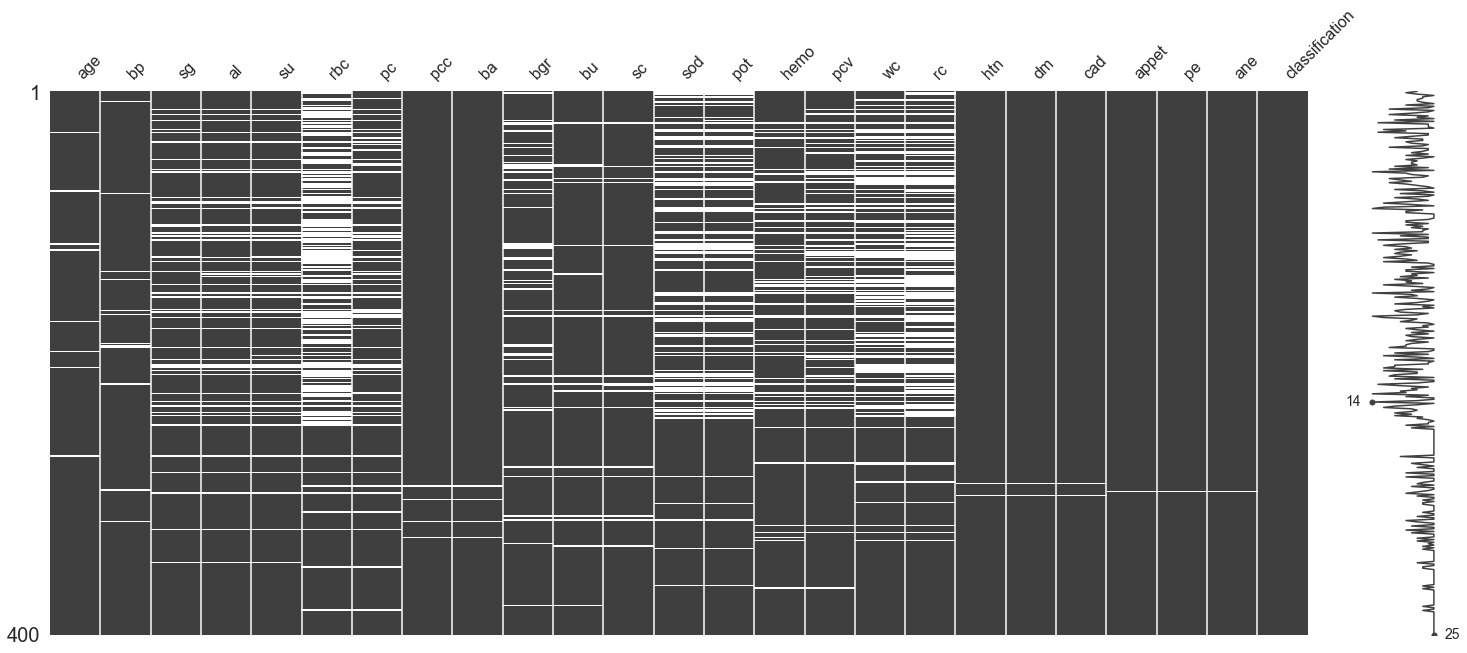

In [80]:
# Visualize the pattern of missing values in the dataset
#using missingo library
#We use the matrix() function from the missingno library to create a matrix plot of the missing values in the dataset. 
#The matrix plot visualizes the pattern of missing values in the dataset, where white cells represent missing values and black cells represent non-missing values.
#The plot helps to identify any systematic patterns in the missing values, such as whether missingness is random or related to other variables in the dataset.
msno.matrix(kidney_disease_df)

We notice  that the missing values for sg,al,su,pc bgr and hemo,pcv are following same pattern with a many missing values we can say that the pattern is MAR or MNAR
<br>
Same for rbc,sod,pot,wc,rc

#### Chi_2_TEST

To test whether the missingness in a variable of a dataset is correlated with other variables or not, you can use a statistical test called a "missingness test" or "missing data analysis".

There are several methods to perform a missingness test, but one commonly used approach is to use a chi-squared test of independence. Here are the steps you can follow:

Identify the variable with missing data and the variables that may be related to it.

Create a new variable indicating whether the original variable is missing or not. You can do this by assigning a value of 1 if the variable is missing and 0 if it is not.

Conduct a chi-squared test of independence between the new missingness variable and each of the other variables in the dataset. The chi-squared test will assess whether there is a statistically significant association between the two variables.

Interpret the results of the chi-squared test. If the p-value is less than the significance level (usually set at 0.05), then there is evidence of a significant association between the missingness of the variable and the other variable. If the p-value is greater than the significance level, then there is no evidence of an association.

If there is evidence of a significant association, further investigation is needed to determine the nature of the association and whether it is causing bias in the analysis. You may need to consider imputation techniques or other methods to deal with missing data.

It's important to note that missingness tests are not foolproof and should be interpreted with caution. Other factors, such as the amount of missing data and the reasons for the missingness, may also affect the results.

Creating a function that uses the chi-squared test of independence to test whether the missingness in a variable of a dataset is correlated with other variables:

In [81]:
def chi_2_correlated_vars(missing_var,related_vars,df): 
    # Identify the variable with missing data and the variables that may be related to it
    #missing_var = 'variable_with_missing_data'
    #related_vars = ['related_variable_1', 'related_variable_2', 'related_variable_3']
    # Create a new variable indicating whether the original variable is missing or not
    serie_missing_indicator = np.where(df[missing_var].isna(), 1, 0)

    # Conduct a chi-squared test of independence for each related variable
    #The crosstab function is used to create a contingency table between each related variable
    #and the missing indicator variable, 
    #and the chi2_contingency function from the SciPy library is used to perform the 
    #chi-squared test of independence. Finally, the results of the test are printed to the console.
    for var in related_vars:
        contingency_table = pd.crosstab(df[var], serie_missing_indicator)
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-squared test for {var} and {missing_var}:")
        print(f"  Chi-squared statistic: {chi2:.2f}")
        print(f"  p-value: {p:.4f}")
        if p < 0.05:
            print("  There is evidence of a significant association.")
        else:
            print("  There is no evidence of an association.")

A commonly used significance level for the p-value is 0.05. If the p-value is less than or equal to 0.05, then the null hypothesis is rejected and the alternative hypothesis is accepted, meaning that there is strong evidence to suggest that there is a difference or a relationship between the variables being tested. If the p-value is greater than 0.05, then the null hypothesis is not rejected, meaning that there is not enough evidence to suggest a difference or a relationship between the variables.

##### Let's test first pattern

In [82]:
related_vars=['al','su','pc','bgr','hemo','pcv']
missing_var='sg'
chi_2_correlated_vars(missing_var,related_vars,kidney_disease_df)

Chi-squared test for al and sg:
  Chi-squared statistic: 3.04
  p-value: 0.6931
  There is no evidence of an association.
Chi-squared test for su and sg:
  Chi-squared statistic: 24.17
  p-value: 0.0002
  There is evidence of a significant association.
Chi-squared test for pc and sg:
  Chi-squared statistic: 0.00
  p-value: 1.0000
  There is no evidence of an association.
Chi-squared test for bgr and sg:
  Chi-squared statistic: 147.69
  p-value: 0.4223
  There is no evidence of an association.
Chi-squared test for hemo and sg:
  Chi-squared statistic: 143.91
  p-value: 0.0305
  There is evidence of a significant association.
Chi-squared test for pcv and sg:
  Chi-squared statistic: 75.78
  p-value: 0.0008
  There is evidence of a significant association.


We notice that sg is associated with  su,hemo,and pcv

In [83]:
related_vars=['sod','pot','wc','rc']
missing_var='rbc'
chi_2_correlated_vars(missing_var,related_vars,kidney_disease_df)

Chi-squared test for sod and rbc:
  Chi-squared statistic: 53.57
  p-value: 0.0132
  There is evidence of a significant association.
Chi-squared test for pot and rbc:
  Chi-squared statistic: 43.97
  p-value: 0.2693
  There is no evidence of an association.
Chi-squared test for wc and rbc:
  Chi-squared statistic: 70.21
  p-value: 0.9181
  There is no evidence of an association.
Chi-squared test for rc and rbc:
  Chi-squared statistic: 66.67
  p-value: 0.0153
  There is evidence of a significant association.


We notice that rbc is associated with  sod,rc

###  Interpretation

For su and sg the the correlation coefficient between two variables is relatively low (e.g., -0.3), but the chi-square test for independence indicates a significant association between the two variables with a p-value less than 0.005, it suggests that there is a statistically significant association between the two variables, but the strength of the association may not be particularly strong.

The chi-square test for independence is a hypothesis test that assesses the independence of two categorical variables. It compares the observed frequency of data in a contingency table to the expected frequency assuming independence, and if the difference between the observed and expected frequency is large enough, the test rejects the null hypothesis of independence in favor of the alternative hypothesis that the variables are associated.

It's important to note that the correlation coefficient measures the linear relationship between two continuous variables, while the chi-square test for independence measures the association between two categorical variables. Therefore, it's possible to have a low correlation coefficient between two continuous variables, but a significant association between two categorical variables.

In conclusion, a low correlation coefficient does not necessarily mean that there is no association between two variables, and a significant chi-square test for independence suggests that there is a significant association between two categorical variables. The interpretation of the results depends on the research question, the variables being studied, and the context of the analysis.

Using Linear regression imputation for numericals variables that have high correlation

#### Indications

There are several ways to test whether linear regression is appropriate for imputing missing values in a given dataset using Python. Here are a few steps you can take:
<ul>
    <li>
Check for missing values: The first step is to identify which variables have missing values in the dataset. You can use Python libraries such as pandas to load the dataset and check for missing values using the isnull() and sum() functions.
    </li>
    <li>
Examine the correlation matrix: You can use the corr() function in pandas to compute the correlation matrix between the variable with missing values and other variables in the dataset. If there is a strong linear relationship between the variable with missing values and one or more other variables, linear regression may be appropriate for imputing missing values.
    </li>
    <li>
Check for linearity: Before using linear regression, you should check whether there is a linear relationship between the variable with missing values and the other variables in the dataset. You can use scatterplots and regression plots to visually inspect the relationship between the variables. You can use Python libraries such as seaborn to create scatterplots and regression plots.
    </li>
    <li>
Check for normality: Linear regression assumes that the variables are normally distributed. You can use the hist() and qqplot() functions in Python libraries such as matplotlib and scipy to check whether the variables are normally distributed.
    </li>
    <li>
Evaluate the performance of linear regression: Once you have imputed the missing values using linear regression, you should evaluate the performance of the imputation method using appropriate metrics such as the RMSE or R-squared. You can use Python libraries such as scikit-learn to fit the linear regression model and compute the RMSE or R-squared.
    </li>
    </ul>
    

We will replace the variables that number of missing values less than 10% of total rows by Mean/mode/median imputation and for others we will interprete and choose the best method

For variable that have much missing values and high correlation we will replace by Multiple regression or simpl linear regression

As we see have seen before : <br>
pcv is correlated highly with hemo and rc <br>
rc and hemo and pcv <br>
rc and pcv postively high 0.79  <br>
bgr and su is positively high 0.72<br>
So we will replace the missing values using linear regression

 Replacing missing values with multiple regression:

Like we have missing values in the predictor variables used for imputation (pcv, hemo)here, we can either drop the rows with missing values or impute them using another method (such as mean imputation or interpolation). <br>
I choose to imput them with mean

In [84]:
def multipleRegressionFillMissVal(var_with_missing,vars_for_imputation,df):
    # Identify the variable with missing values and the variables to use for imputation
    # Split the data into two sets: one with missing values and one without
    data_missing = df[df[var_with_missing].isnull()]
    data_not_missing = df[df[var_with_missing].notnull()]

    # Impute missing values in the predictor variables
    for var in vars_for_imputation:
        data_not_missing[var].fillna(data_not_missing[var].mean(), inplace=True)
    # Impute missing values in data_missing[vars_for_imputation] using mean imputation
    for var in vars_for_imputation:
        data_missing[var].fillna(data_not_missing[var].mean(), inplace=True)
    # Fit a multiple linear regression model to the data without missing values
    model = LinearRegression()
    model.fit(data_not_missing[vars_for_imputation], data_not_missing[var_with_missing])
    # Predict the missing values using the fitted model
    imputed_values = model.predict(data_missing[vars_for_imputation])
    # Replace the missing values with the imputed values
    # Fill in the missing values with the imputed values
    df[var_with_missing] = df[var_with_missing].fillna(pd.Series(imputed_values, index=data_missing.index))




In [85]:
var_with_missing = 'rc'
vars_for_imputation = ['pcv', 'hemo']
multipleRegressionFillMissVal(var_with_missing,vars_for_imputation,kidney_disease_df)

C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_missing[var].fillna(data_not_missing[var].mean(), inplace=True)
C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing[var].fillna(data_not_missing[var].mean(), inplace=True)


In [86]:
kidney_disease_df.isnull().sum()


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Showing the correlation matrix again

In [87]:
# create a correlation matrix between numerical values
def corr_matrix_seaborn(df):
    corr_matrix = kidney_disease_df.corr(method='pearson')


    # create the heatmap
    fig, ax = plt.subplots(figsize=(10, 7)) # adjust the figure size
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    ax.set_title('Correlation Matrix', fontsize=16) # add a title and adjust font size
    plt.show() # display the figuretrix, annot=True, cmap='coolwarm')


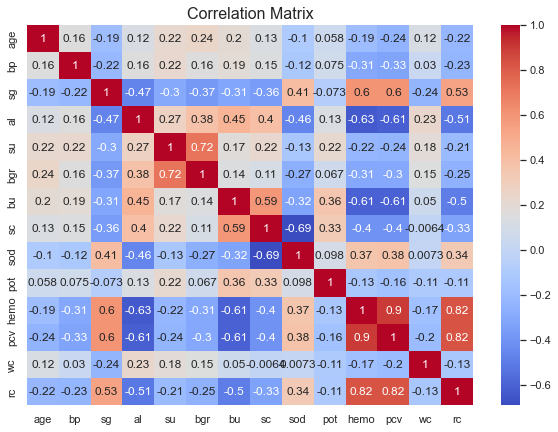

In [88]:
corr_matrix_seaborn(kidney_disease_df)

We will repeat this process for hemo and pcv

In [89]:
var_with_missing = 'pcv'
vars_for_imputation = ['rc', 'hemo']
multipleRegressionFillMissVal(var_with_missing,vars_for_imputation,kidney_disease_df)

C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_missing[var].fillna(data_not_missing[var].mean(), inplace=True)
C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing[var].fillna(data_not_missing[var].mean(), inplace=True)


In [90]:
kidney_disease_df.isnull().sum()


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                 0
wc                106
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

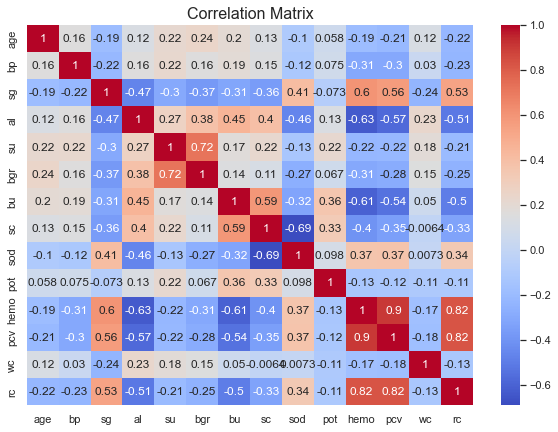

In [91]:
corr_matrix_seaborn(kidney_disease_df)

In [92]:
var_with_missing = 'hemo'
vars_for_imputation = ['pcv', 'rc']
multipleRegressionFillMissVal(var_with_missing,vars_for_imputation,kidney_disease_df)

C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_missing[var].fillna(data_not_missing[var].mean(), inplace=True)
C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing[var].fillna(data_not_missing[var].mean(), inplace=True)


In [93]:
kidney_disease_df.isnull().sum()


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo                0
pcv                 0
wc                106
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

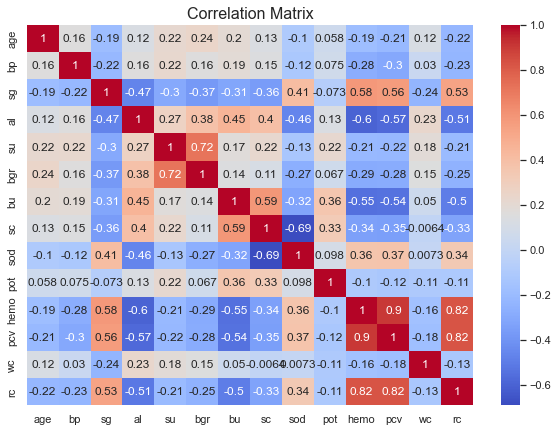

In [94]:
corr_matrix_seaborn(kidney_disease_df)

In [95]:
var_with_missing = 'bgr'
vars_for_imputation = ['su']
multipleRegressionFillMissVal(var_with_missing,vars_for_imputation,kidney_disease_df)

C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_missing[var].fillna(data_not_missing[var].mean(), inplace=True)
C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing[var].fillna(data_not_missing[var].mean(), inplace=True)


In [96]:
kidney_disease_df.isnull().sum()


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                 19
sc                 17
sod                87
pot                88
hemo                0
pcv                 0
wc                106
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

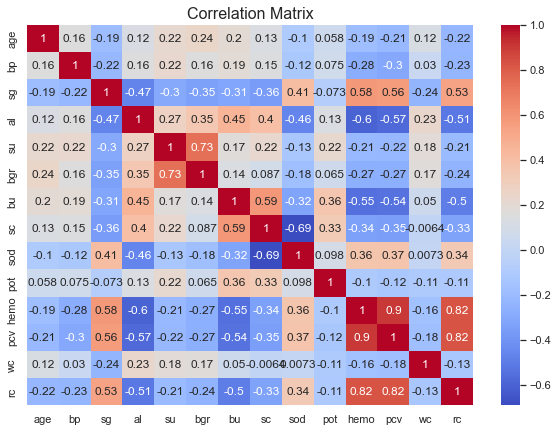

In [97]:
corr_matrix_seaborn(kidney_disease_df)

In [98]:
var_with_missing = 'su'
vars_for_imputation = ['bgr']
multipleRegressionFillMissVal(var_with_missing,vars_for_imputation,kidney_disease_df)

C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_missing[var].fillna(data_not_missing[var].mean(), inplace=True)
C:\Users\worker\AppData\Local\Temp\ipykernel_12756\816345629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing[var].fillna(data_not_missing[var].mean(), inplace=True)


In [99]:
kidney_disease_df.isnull().sum()


age                 9
bp                 12
sg                 47
al                 46
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                 19
sc                 17
sod                87
pot                88
hemo                0
pcv                 0
wc                106
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

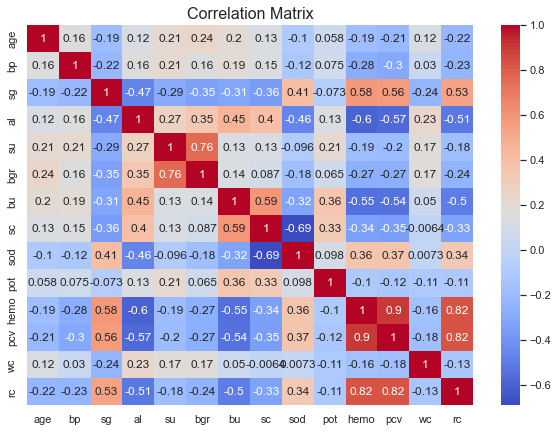

In [100]:
corr_matrix_seaborn(kidney_disease_df)

In [101]:
kidney_disease_df["age"].fillna(kidney_disease_df["age"].mean(), inplace=True)
kidney_disease_df["bp"].fillna(kidney_disease_df["bp"].mean(), inplace=True)
kidney_disease_df["sg"].fillna(kidney_disease_df["sg"].mean(), inplace=True)
kidney_disease_df["al"].fillna(kidney_disease_df["al"].mean(), inplace=True)
kidney_disease_df["bu"].fillna(kidney_disease_df["bu"].mean(), inplace=True)
kidney_disease_df["sc"].fillna(kidney_disease_df["sc"].mean(), inplace=True)
kidney_disease_df["sod"].fillna(kidney_disease_df["sod"].mean(), inplace=True)
kidney_disease_df["pot"].fillna(kidney_disease_df["pot"].mean(), inplace=True)
kidney_disease_df["wc"].fillna(kidney_disease_df["wc"].mean(), inplace=True)

In [102]:
kidney_disease_df.isnull().sum()


age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Now we have to deal with the categorical values.

In [103]:
 kidney_disease_df["rbc"].fillna(kidney_disease_df["rbc"].mode()[0], inplace=True)
 kidney_disease_df["pc"].fillna(kidney_disease_df["pc"].mode()[0], inplace=True)
 kidney_disease_df["pcc"].fillna(kidney_disease_df["pcc"].mode()[0], inplace=True)
 kidney_disease_df["ba"].fillna(kidney_disease_df["ba"].mode()[0], inplace=True)
 kidney_disease_df["htn"].fillna(kidney_disease_df["htn"].mode()[0], inplace=True)
 kidney_disease_df["dm"].fillna(kidney_disease_df["dm"].mode()[0], inplace=True)
 kidney_disease_df["cad"].fillna(kidney_disease_df["cad"].mode()[0], inplace=True)
 kidney_disease_df["appet"].fillna(kidney_disease_df["appet"].mode()[0], inplace=True)
 kidney_disease_df["pe"].fillna(kidney_disease_df["pe"].mode()[0], inplace=True)
 kidney_disease_df["ane"].fillna(kidney_disease_df["ane"].mode()[0], inplace=True)


In [104]:
kidney_disease_df.isnull().sum()


age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## Visualisation of dataset to Interpret which model we can use  

This will create a scatterplot matrix of the kidney dataset, with different colors indicating the 2 classification.<br> This technique inspect the relationship between the features and determine which kernel to use for your SVM model.

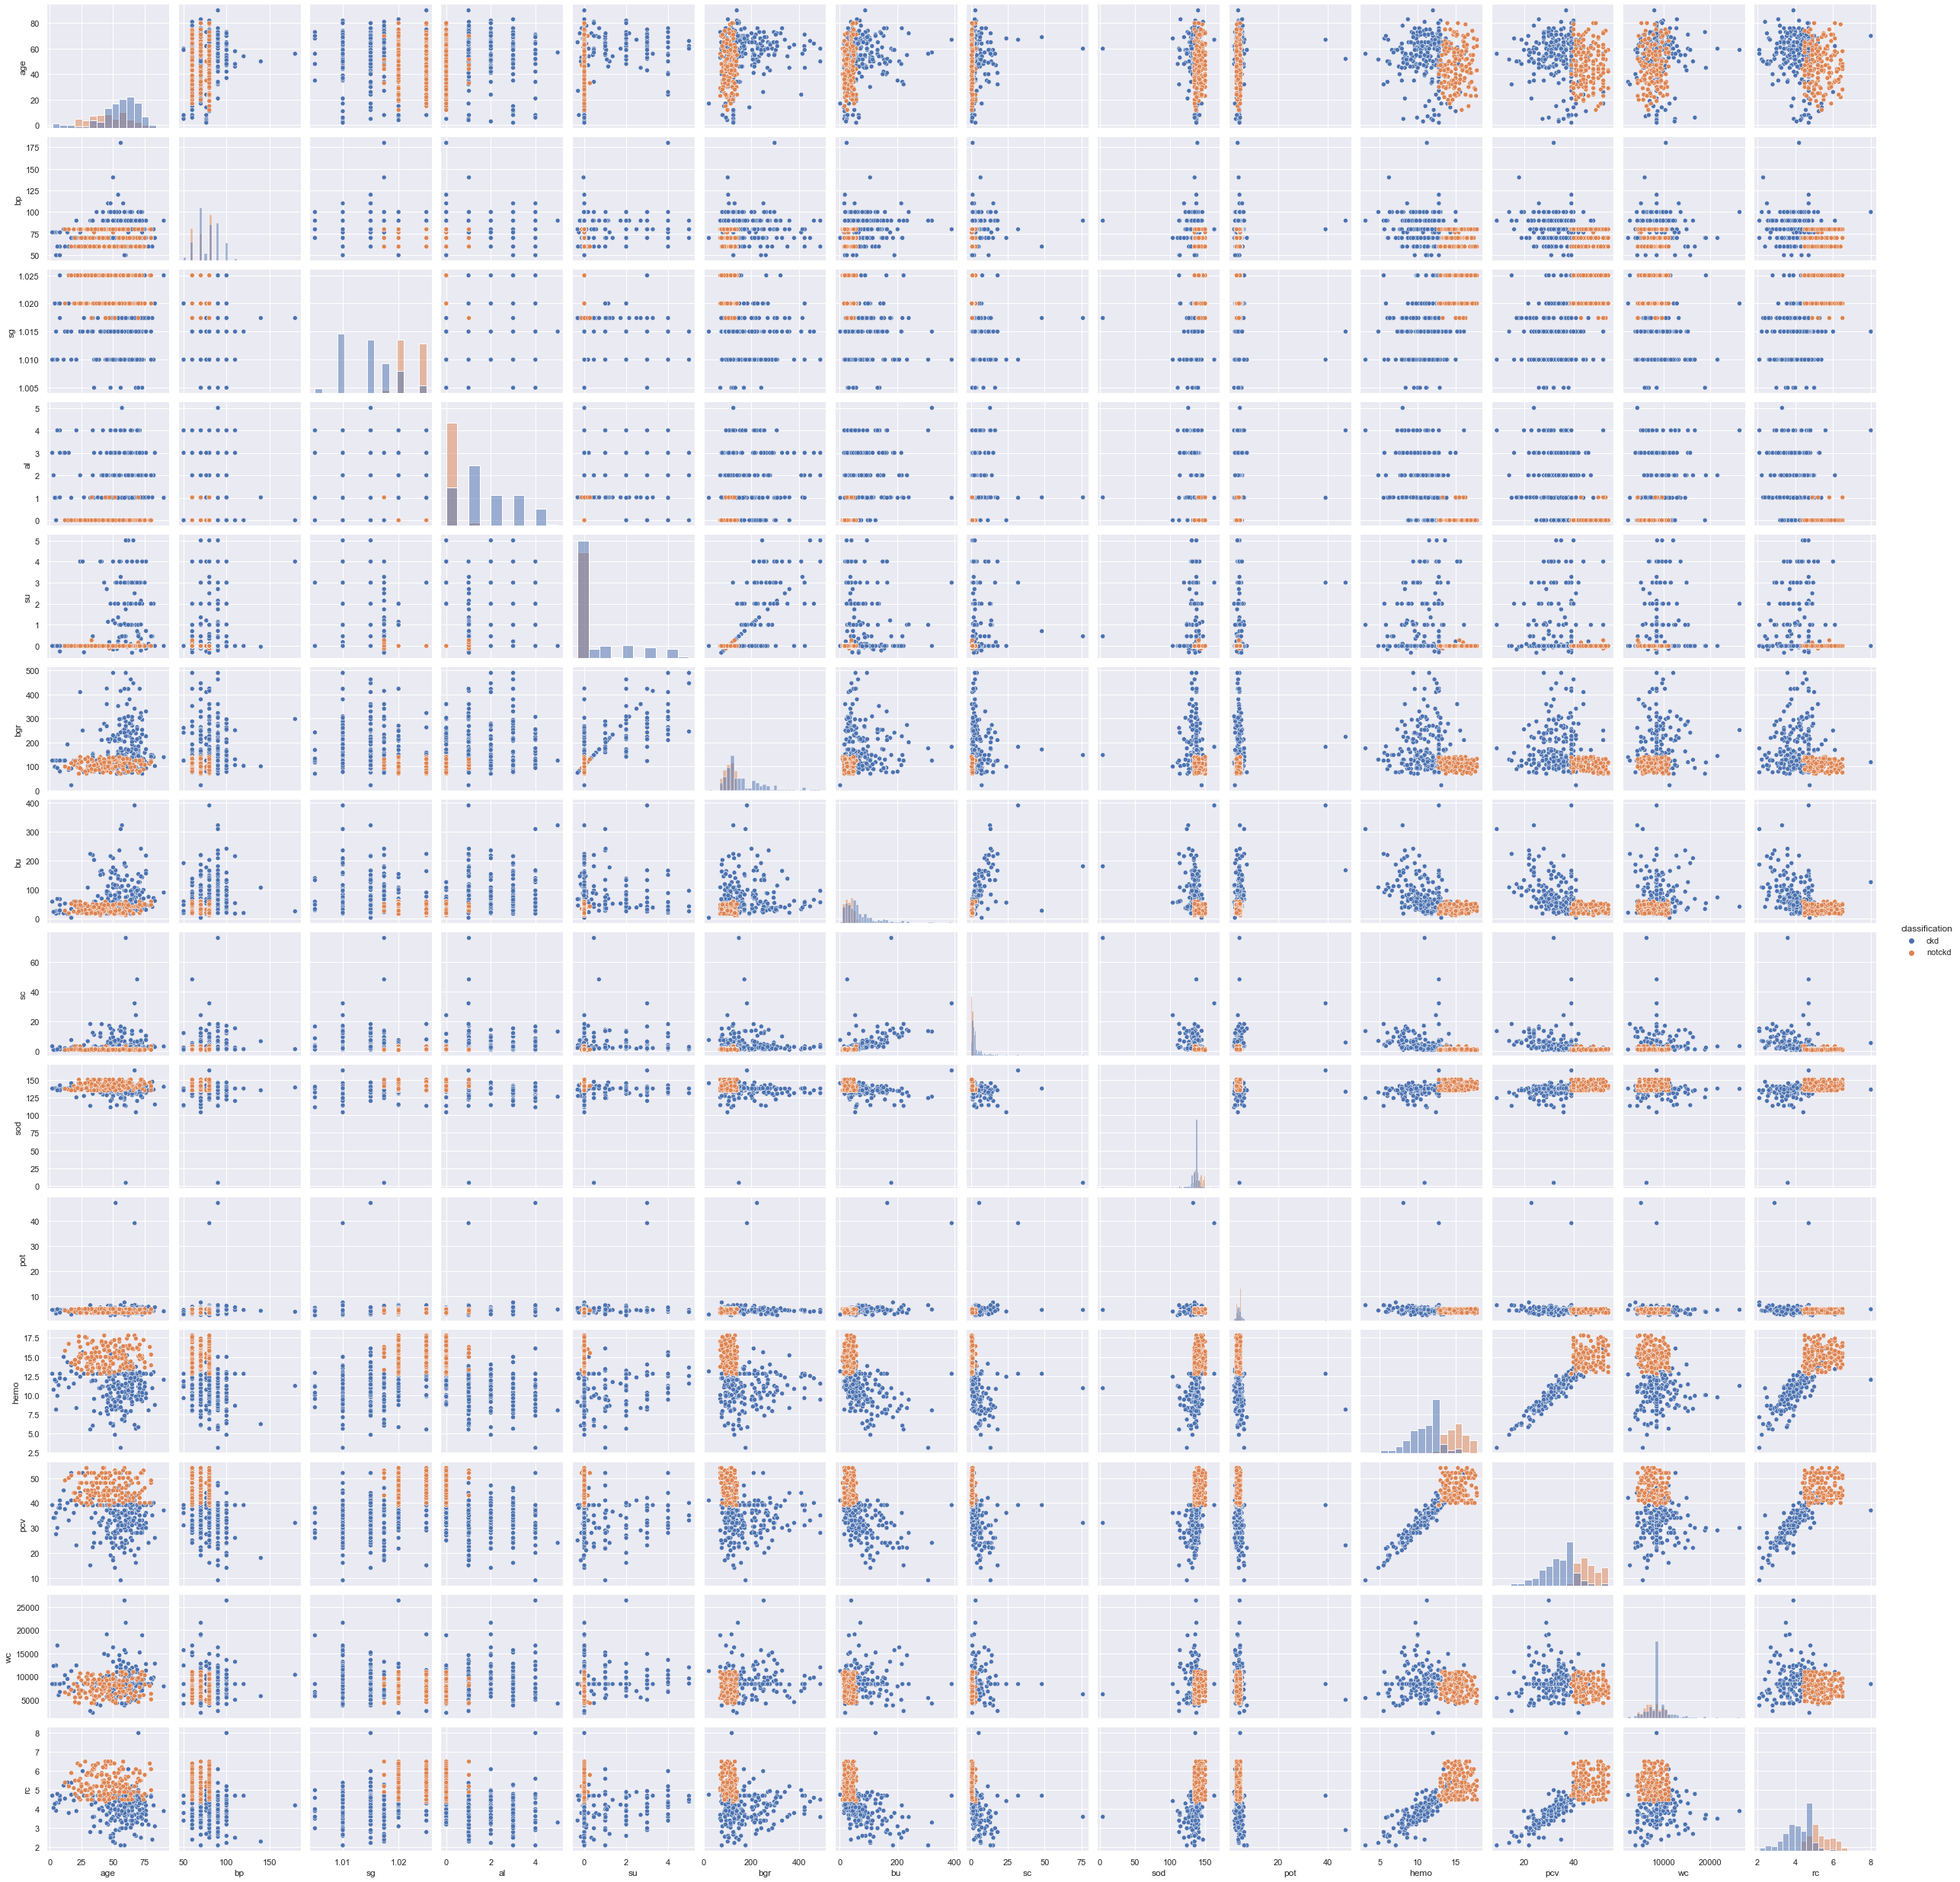

In [105]:

# Create a pairplot of the  dataset
sns.pairplot(kidney_disease_df, hue="classification", diag_kind="hist")


 # Feature Encoding

### Label Encoding classification variable

<AxesSubplot:xlabel='classification', ylabel='count'>

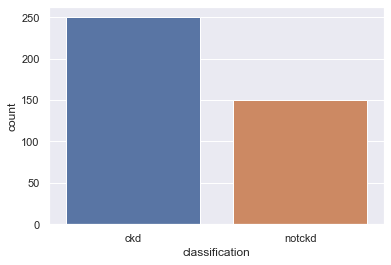

In [106]:
sns.set_style('darkgrid')
sns.countplot(x='classification',data=kidney_disease_df)

In [107]:
# Assuming the variable you want to encode is called 'category' in your DataFrame
le = LabelEncoder()
kidney_disease_df['classification'] = le.fit_transform(kidney_disease_df['classification'])
#reverse the classfication numbers(1 to mean ckd , 0 to mean notckd)
# create a dictionary to map the values
label_map = {0: 1, 1: 0}
# use the map() function to apply the mapping to the 'label' column
kidney_disease_df['classification'] = kidney_disease_df['classification'].map(label_map)

In [108]:
kidney_disease_df['classification']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

### One hot encoding the categorical features

In general, SVMs work best with numerical data, so it is recommended to use one hot encoding or some other form of numerical encoding for categorical variables before using them in an SVM model. However, some SVM implementations can handle categorical variables directly by mapping them to numerical values internally. In any case, it is important to ensure that the encoding of categorical variables is meaningful and appropriate for the data and the problem at hand.

If the target variable is already binary (i.e., has only two classes), then you do not need to use one-hot encoding. You can directly use the binary target variable as is with the SVM model.

However, if the target variable has more than two classes, then you need to use one-hot encoding to represent it as binary variables.

In [109]:
kidney_disease_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,124.813035,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.340608,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.755212,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,1


In [110]:
# identify categorical columns
cat_cols = kidney_disease_df.select_dtypes(include=['object']).columns


# apply one-hot encoding for each categorical column
for col in cat_cols:
    # create the one-hot encoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    # fit the encoder on the column
    encoder.fit(kidney_disease_df[[col]])
    
    # transform the column
    encoded = encoder.transform(kidney_disease_df[[col]]).toarray()
    
    # create new column names based on the original column name and the one-hot encoding category
    new_col_names = [col + '_' + str(category) for category in encoder.categories_[0]]
    
    # create a new dataframe with the one-hot encoded variables
    encoded_df = pd.DataFrame(encoded, columns=new_col_names)
    
    # merge the encoded dataframe with the original dataframe
    kidney_disease_df = pd.concat([kidney_disease_df, encoded_df], axis=1)

# drop the original categorical columns
kidney_disease_df.drop(cat_cols, axis=1, inplace=True)

# the resulting dataframe will have one-hot encoded variables for each categorical variable
kidney_disease_df.columns.size


35

The number of categorical has been 10(excluding the classification target) , and each variable have 2 modality so the total will be 22 , +14 numerical values that will be 35

In [111]:
kidney_disease_df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,7.0,50.0,1.020,4.0,0.0,124.813035,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.340608,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.755212,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Model Building

### SVM model 

SVM is a machine learning algorithm used for classification and regression analysis. It finds the best possible decision boundary that separates the different classes in the input space. SVM can handle linear and non-linearly separable datasets by mapping the input space into a higher-dimensional feature space using a kernel function. SVMs are widely used in various applications and are known for their ability to handle high-dimensional data and noisy datasets.

We will choose the best kernel of SVM model 

In [112]:
# Define the list of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop over the kernels and train and test a SVM classifier for each kernel
for kernel in kernels:

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(kidney_disease_df.drop('classification', axis=1), kidney_disease_df['classification'], test_size=0.3, random_state=42)
    # Create an instance of the SVM classifier
    svm = SVC(kernel=kernel)
    # Train the SVM classifier on the training data
    svm.fit(X_train, y_train)

    # Use the trained SVM classifier to make predictions on the testing data
    y_pred = svm.predict(X_test)

    # Compute the accuracy score of the SVM classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score of the SVM classifier for the current kernel
    print(f'Accuracy ({kernel} kernel): {accuracy}')

    # Compute the precision, recall, and F1-score of the SVM classifier for the current kernel
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the precision, recall, and F1-score of the SVM classifier for the current kernel
    print(f'Precision ({kernel} kernel): {precision}')
    print(f'Recall ({kernel} kernel): {recall}')
    print(f'F1-score ({kernel} kernel): {f1}')

    # Compute the confusion matrix of the SVM classifier for the current kernel
    cm = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix of the SVM classifier for the current kernel
    print(f'Confusion matrix ({kernel} kernel):')
    print(cm)

Accuracy (linear kernel): 0.9833333333333333
Precision (linear kernel): 0.9868421052631579
Recall (linear kernel): 0.9868421052631579
F1-score (linear kernel): 0.9868421052631579
Confusion matrix (linear kernel):
[[43  1]
 [ 1 75]]
Accuracy (poly kernel): 0.6333333333333333
Precision (poly kernel): 0.6333333333333333
Recall (poly kernel): 1.0
F1-score (poly kernel): 0.7755102040816326
Confusion matrix (poly kernel):
[[ 0 44]
 [ 0 76]]
Accuracy (rbf kernel): 0.6333333333333333
Precision (rbf kernel): 0.6333333333333333
Recall (rbf kernel): 1.0
F1-score (rbf kernel): 0.7755102040816326
Confusion matrix (rbf kernel):
[[ 0 44]
 [ 0 76]]
Accuracy (sigmoid kernel): 0.5166666666666667
Precision (sigmoid kernel): 0.59375
Recall (sigmoid kernel): 0.75
F1-score (sigmoid kernel): 0.6627906976744186
Confusion matrix (sigmoid kernel):
[[ 5 39]
 [19 57]]


We  choose then the linear model to train our data

Accuracy: 0.9916666666666667
Best hyperparameters: {'C': 0.1}
Precision: 0.987012987012987
Recall: 1.0
F1-score: 0.9934640522875817


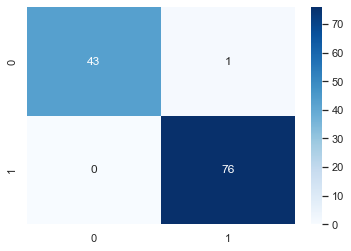

In [113]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(kidney_disease_df.drop('classification', axis=1), kidney_disease_df['classification'], test_size=0.3, random_state=42)

# Create an instance of the SVM classifier
svm = SVC(kernel="linear")

# Define the grid of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
}

# Use GridSearchCV to find the best hyperparameters
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}
grid_search = GridSearchCV(svm, param_grid, scoring=scoring, refit='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Use the best model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Compute the accuracy score of the best model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score of the best model
print('Accuracy:', accuracy)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters:', best_params)

# Compute the confusion matrix of the best model
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Compute the precision, recall, and F1-score of the best model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the precision, recall, and F1-score of the best model
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


An accuracy score of 0.9916 is generally considered very good, indicating that the model is making accurate predictions. <br>
A precision score of 0.987 means that most of the predicted positive cases were actually positive, while the recall score of 1 means that the model correctly identified all of the actual positive cases.<br> The F1 score of 0.9885 is a weighted average of the precision and recall, which indicates that the model is performing very well in terms of both precision and recall.

Overall, these evaluation metrics suggest that the model is performing very well on the test data. However, it's always important to consider the context of the problem and the specific requirements of the application to determine if the performance is good enough for the given task.

## MLP Classifier Model

The MLPClassifier is a supervised learning algorithm that is part of the neural network family of models. MLP stands for "Multi-Layer Perceptron". It is a feedforward artificial neural network model that uses a series of input and hidden layers to make predictions.

Accuracy: 0.9
Precision: 0.872093023255814
Recall: 0.9868421052631579
F1-score: 0.925925925925926


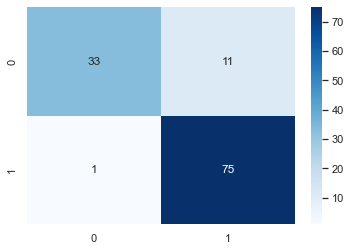

In [114]:

# Define the parameter grid for the MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (20, 20, 20)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create an instance of the MLPClassifier
mlp = MLPClassifier()

# Use GridSearchCV to find the best set of hyperparameters for the MLPClassifier
mlp_grid = GridSearchCV(mlp, param_grid=param_grid, cv=3, n_jobs=-1)
mlp_grid.fit(X_train, y_train)

# Use the trained MLPClassifier to make predictions on the testing data
y_pred = mlp_grid.predict(X_test)

# Compute the accuracy score of the MLPClassifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score of the MLPClassifier
print('Accuracy:', accuracy)

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


##  Logistic Regression Model

C:\Users\worker\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\worker\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\worker\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9666666666666667
Precision: 0.9615384615384616
Recall: 0.9868421052631579
F1-score: 0.974025974025974


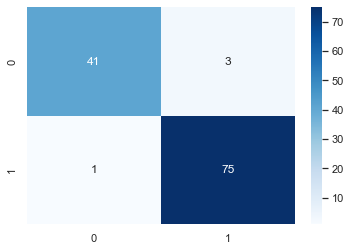

In [115]:
# Create an instance of the Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)

# Define the range of values for the regularization parameter C
params = {'C': np.logspace(-3, 3, 7)}

# Create an instance of GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lr, params, cv=5, scoring='accuracy')

# Train the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions on the testing data
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute the accuracy score of the Logistic Regression classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score of the Logistic Regression classifier
print('Accuracy:', accuracy)

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')





# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

We notice that SVM is the best model

# Model saving

### Saving the model in ppml format

To use the model in spring boot REST api i will use the pmml format(predictive model markup language) 

In [117]:
#
# Create a PMML pipeline and save the model as a PMML file
pipeline = PMMLPipeline([('svm', svm)])
sklearn2pmml(pipeline, "H:/ids4/2emesem/data mining/svm_model.pmml")

### Using another library 

In [118]:
# Save the trained model using joblib
#joblib.dump(svm, 'H:/ids4/2emesem/data mining/svm_model.joblib')

# Model Deployment

In [120]:


app = Flask(__name__)

# Define a route for making predictions using the trained model
@app.route('/', methods=['GET'])
def hello():
    # Return the msg  as a JSON response
    return jsonify({'msg': "Hello This is my  API for kidney disease predictin :) Made By Iheb"})
# Define a route for making predictions using the trained model
@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data as a dictionary
    data = request.json

    # Convert the input data to a numpy array
    values=list(data.valueds())
    labels=list(data.keys())
    # create a dictionary with labels as keys and values as values
    data_dict = dict(zip(labels, values))

    # create a dataframe from the dictionary with one row
    x_test = pd.DataFrame(data_dict, index=[0])
    #print(x_test.shape)
    prediction = svm.predict(x_test)[0]
    
    # Return the predicted class as a JSON response
    return jsonify({'prediction': int(prediction)})

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Apr/2023 01:15:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2023 01:15:11] "GET / HTTP/1.1" 200 -


Author <b>Missaoui Iheb </b>